# Image Representation

In this notebook, we would look at image representation and histograms. Also, we would implement a function for skin detection and another for to give color to images.

### Image Representation

Images can be represented as functions of pixel positions. For grayscale images the output of this function is the pixel intensity at a position while for color images, it is a vector containing values for each color channel.

Import packages

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read in a test image

In [0]:
im_path = "./femi.jpg"
test_image = None
# TODO read in the image with name femi.jpg
test_image = cv2.imread(im_path)

displayn test image

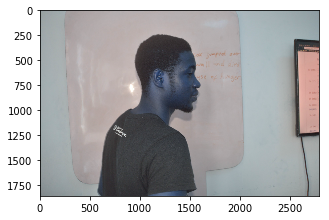

In [5]:
plt.figure(figsize=(5,5))
# TODO display the test image
plt.imshow(test_image)

If the test image is in BGR format, convert it to RGB

In [0]:
# TODO convert test image to RGB format if it's in BGR
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)


Create a function that takes in a pixel position and returns the pixel value at that position

In [0]:
def imfunc(x1, x2):
    
    output = None
    ## TODO 
    output = test_image[x1,x2]
    
    return output

In [28]:
imfunc(30,30)

array([164, 161, 152], dtype=uint8)

computing image histograms:

use cv2.calcHist([images], [channels], None, [bins], [range])

In [0]:
gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# TODO use the calcHist function in opencv to compute
# the histogram of the image
hist = cv2.calcHist([gray], [0], None, [256],[0, 256])



In [34]:
test_image.shape

(1854, 2788, 3)

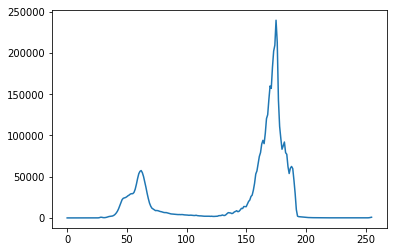

In [37]:
plt.plot(hist)

skin detection

In [0]:
# skin color range in hsv
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

# TODO detect the skin pixels in the test images.
# i.e colors outside the range above
# use cv2.inRange function
hsv = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)
skin_pixels = None
mask = cv2.inRange(hsv, lower, upper)


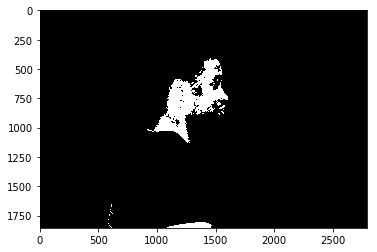

In [44]:
plt.imshow(mask, cmap="gray")

In [0]:
# code snippet from pyimagesearch

# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMask = cv2.erode(mask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

# blur the mask to help remove noise, then apply the
# mask to the frame
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

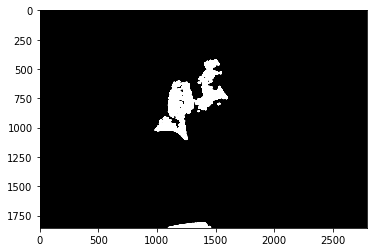

In [46]:
plt.imshow(skinMask,"gray")

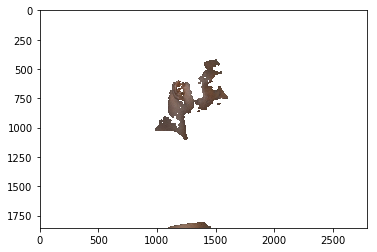

In [74]:
# display original image with only skin pixels
img = np.expand_dims(skinMask, -1)//255 * test_image
img[img == 0] = 255
img.shape
plt.imshow(img)

## color to grayscale

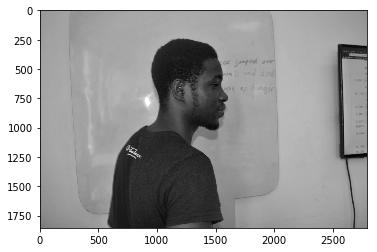

In [75]:
plt.imshow(gray, cmap="gray")

using colormap in opencv

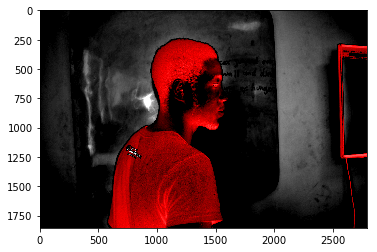

In [82]:
hsv_img = cv2.applyColorMap(gray, cv2.COLORMAP_HSV)
rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_img)

loop through esch pixel of the image

In [0]:
res_img = cv2.resize(gray, (50,50)) # get a resized image
H, W = res_img.shape

In [0]:
for h in range(H):
    for w in range(W):
        # perform operation on pixel at position h,w